# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [55]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import scipy.stats as st

### Load the dataset

Load the cleaned dataset.

In [56]:
wnba = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week5/M2-mini-project2/your-code/wnba_clean.csv')
wnba.head(10)

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,...,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,...,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,...,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,...,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,...,3,9,12,12,7,0,14,50,0,0
5,5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,...,3,13,16,11,5,0,11,26,0,0
6,6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,...,1,14,15,5,4,3,3,24,0,0
7,7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,...,9,83,92,95,20,13,59,442,0,0
8,8,Allisha Gray,DAL,G,185,76,22.205990,US,"October 20, 1992",24,...,52,75,127,40,47,19,37,395,0,0
9,9,Allison Hightower,WAS,G,178,77,24.302487,US,"June 4, 1988",29,...,3,7,10,10,5,0,2,36,0,0


In [57]:
wnba.columns

Index(['Unnamed: 0', 'Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI',
       'Birth_Place', 'Birthdate', 'Age', 'College', 'Experience',
       'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'DD2', 'TD3'],
      dtype='object')

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

I would calculate a t-test therefore the t-value by:
- Computing the difference between the mean values from each data set (called the mean difference)
- Computing the standard deviation of the sample
- Computing the number of data values of the sample
- Knowing the confidence level

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [58]:
mean_w = wnba['Weight'].mean()

std_w = wnba['Weight'].std(ddof =1) # std of the sample

n_wnba = len(wnba)

print(mean_w)
print(std_w)
print(n)

c = 0.95 #confidence level of 95%

interval_w = st.t.interval(c, n_wnba-1, loc=mean_w, scale=std_w/np.sqrt(n))
print(interval_w)

78.97887323943662
10.996110408297898
142
(77.15461406720749, 80.80313241166576)


**What can you say about these results?**

We can see that the average weight of a female basketball player is between 77kg and 80.8kg. 

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

I would say that my sister weighs 10kg below the minimum value of the weight range of the female basketball players of the wbna.  

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

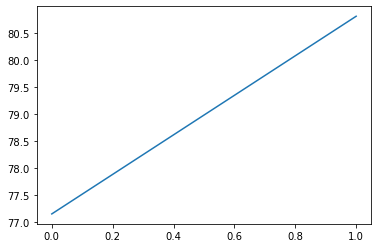

In [59]:
plt.plot(interval_w)
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

I would try hypothesis testing. And follow the 6 steps:

1. SET THE HYPOTESIS 
2. CHOOSE SIGNIFICANCE LEVEL
3. SAMPLE
4. COMPUTE THE STATISTIC 
5. GET p-VALUE
6. DECIDE

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [60]:
# 1. SET THE HYPOTESIS 

##NOTE: mu -> is the average of the population 

# H0: mu is Female professional basketball players miss >= 40% of their free throws
# H1: mu is Female professional basketball players miss > 40% of their free throws


## One tailed test

In [61]:
# 2. CHOOSE THE SIGNIFICANCE LEVEL

# significance level = 5%

alpha = 0.05 #opposite of confidence level of 95%

In [62]:
# 3. SAMPLE is wbna

# 4. COMPUTE STATISTICS


## The formula is: (X_hat - mu)/(s/np.sqrt(n))

# Mean of our sample (x_hat)
x_hat = wnba['FT%'].mean() 

# Standard deviation of our sample
s = wnba['FT%'].std(ddof=1) # ddof =1 because we are computing the standard deviation of our sample

# Mu and n
mu = 78.97887323943662 #taken fromt the population
n = n_wnba

# Compute the interval

st.t.interval(c, n-1, loc=x_hat, scale=s/np.sqrt(n))


(72.75371835469808, 78.90402812417513)

**What can you comment about our result? What would you tell your sister?**

My sister is wrong, because with a confidence level of 95%, we can state that, between 72.75% and 78.9%, our female basketball players successyllu throw free throws in the basket.

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [63]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [64]:
#your-answer-here

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [65]:
# H0: mean_female = mean_combined

# H0: mean_female != mean_combined

alpha = 0.05

stats, p_value = st.ttest_1samp(wnba["AST"], 52)

print(stats)
print(p_value)

print(p_value < alpha)

-2.1499947192482898
0.033261541354107166
True


#### Comments:
Since p_value is smaller than our interval vote of 5%, we are likely to believe that the average of female played is not equal to the average of both female and male players combined

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [66]:
# H0: mean_female >= mean_combined

# H0: mean_female < mean_combined

alpha = 0.05

stats, p_value = st.ttest_1samp(wnba["AST"], 52, alternative='less')

print(stats)
print(p_value)

print(p_value < alpha)

-2.1499947192482898
0.016630770677053583
True


#### Comments: 
We do not reject H0

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [67]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [68]:
#your-answer-here

In [69]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here